In [1]:
#importing the required libraries
import matplotlib as plt
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sbs_q3
import pandas as pd

In [2]:
#splitting the data into train and test data 
iris= datasets.load_iris()
X_data,y_target=iris.data,iris.target
X_train_data, X_test_data, y_train_target, y_test_target = train_test_split(X_data, y_target, train_size=0.8, random_state=42)


In [3]:
# finding mean accuracy at different values of c using cross val score
c_values= [0.1, 0.5, 1, 2, 5, 10, 20, 50]
mean_accuracy=[]
print("\t\tMEAN ACCURACY AT DIFFERENT C-VALUES\n\n")
for i in c_values:
    scores=[]
    clfier_1 = svm.SVC(kernel='linear',C=i)
    scores=cross_val_score(clfier_1, X_train_data, y_train_target, cv=10) 
# dividing the training data of 80% into ratio of 90:10 for multiple splits using one fold for testing at a time.
    print("Mean Accuracy:  ",scores.mean(),"at c= ",i)
    mean_accuracy.append(scores.mean())
    

		MEAN ACCURACY AT DIFFERENT C-VALUES


Mean Accuracy:   0.9583333333333334 at c=  0.1
Mean Accuracy:   0.9583333333333333 at c=  0.5
Mean Accuracy:   0.9583333333333333 at c=  1
Mean Accuracy:   0.9583333333333334 at c=  2
Mean Accuracy:   0.9583333333333334 at c=  5
Mean Accuracy:   0.95 at c=  10
Mean Accuracy:   0.9333333333333332 at c=  20
Mean Accuracy:   0.9333333333333332 at c=  50


In [4]:
# finding value of c giving highest accuracy 
best_accuracy=max(mean_accuracy)
best_c_with_highest_accuracy=[]
itrtr=0
for k in mean_accuracy:
    if k==best_accuracy:
        best_c_with_highest_accuracy.append(c_values[itrtr])
    itrtr+=1
print("\n\nBest values for C with highest accuracy at: ",best_accuracy,"are",best_c_with_highest_accuracy)




Best values for C with highest accuracy at:  0.9583333333333334 are [0.1, 2, 5]


<h3>We find the best values of c for the validation set giving the highest accuracy of 95.834% are [0.1,2,5]</h3>


In [5]:
#converting and printing the dataframe of accuracy vs c
c_df=pd.DataFrame(c_values)
mean_accuracy_df=pd.DataFrame(mean_accuracy)
join = pd.concat([c_df, mean_accuracy_df], axis=1)
join.columns=[ 'C values','Mean accuracy']
print('\n\n Mean accuracy and c-values dataframe is:\n\n', join)



 Mean accuracy and c-values dataframe is:

    C values  Mean accuracy
0       0.1       0.958333
1       0.5       0.958333
2       1.0       0.958333
3       2.0       0.958333
4       5.0       0.958333
5      10.0       0.950000
6      20.0       0.933333
7      50.0       0.933333


<h3>Here we are converting and displaying the dataframe </h3>

Text(0.5, 1.0, 'Accuracy vs C-Values')

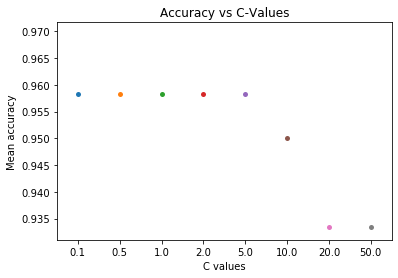

In [6]:
#plotting the graph 
sbs_q3.swarmplot( x='C values',y='Mean accuracy', data=join)
plt.pyplot.title("Accuracy vs C-Values")

In [7]:
#finding accuracy on test data for best values of c.
print("\n\n\t\tTEST DATA accuracy at Best C\n\n")
for values in [0.1,2]:
    clfier_2 = svm.SVC(kernel='linear', C=values).fit(X_train_data,y_train_target)
    print("Accuracy for c=  ",values,"for test data is : ",clfier_2.score(X_test_data, y_test_target))
    



		TEST DATA accuracy at Best C


Accuracy for c=   0.1 for test data is :  1.0
Accuracy for c=   2 for test data is :  1.0


<h3>From the 3 values of c giving highest accuracy, I have choosen c=2 as the perfect value </h3>

<h3>1. when the value of C= 0.1, the margins will be high but there will be some sort of misclassification for training data which may not be reflected in predicting the test data and this may also give high accuracy for test data which can be seen when passed for test data. Thus, it misclassifies the linear training data too.</h3>

<h3>2. But when the value of c=2, it doesn't misclassify that much for the training data and gives a descent accuracy for both training and testing data.</h3>

<h3>3. A low c value is best if it misclassifies 1 point rather than a high C misclassifying more points with low margins.</h3>
